In [39]:
import pandas as pd
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [40]:
#Loading Train dataset and test dataset 
test_data = pd.read_csv(r"C:\Users\anusr\Downloads\184-702-tu-ml-2025-w-reviews\amazon_review_ID.shuf.tes.csv")
train_data = pd.read_csv(r"C:\Users\anusr\Downloads\184-702-tu-ml-2025-w-reviews\amazon_review_ID.shuf.lrn.csv")
display(train_data.head())
display(test_data.head())

display(train_data.describe())
display(train_data.info())
display(train_data['Class'].unique())

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,17,4,8,8,9,4,0,2,3,...,0,0,0,0,0,0,0,1,1,Shea
1,1,21,9,5,8,6,2,16,3,12,...,0,0,0,2,2,1,0,1,0,Riley
2,2,9,7,6,3,8,2,9,4,4,...,0,0,0,0,0,0,0,1,1,Chachra
3,3,8,3,5,2,4,3,8,2,4,...,0,0,1,0,1,0,0,0,0,Agresti
4,4,15,8,8,4,7,8,4,7,1,...,0,0,0,0,0,0,0,0,0,Nigam


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,750,23,6,4,7,11,0,5,2,6,...,0,0,1,0,0,0,0,0,0,0
1,751,20,12,15,6,9,14,2,6,2,...,1,3,0,0,0,0,0,0,0,0
2,752,13,10,10,5,12,5,3,4,5,...,1,0,1,0,0,0,1,0,1,1
3,753,14,15,6,1,7,2,7,2,5,...,0,0,1,2,0,2,1,0,1,0
4,754,9,8,3,4,10,3,2,2,1,...,0,0,0,0,0,0,0,0,1,0


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,374.50000,11.612000,7.317333,6.724000,6.385333,6.169333,4.561333,3.981333,3.562667,2.949333,...,0.170667,0.209333,0.208000,0.232000,0.201333,0.225333,0.190667,0.208000,0.208000,0.216000
std,216.65064,5.424576,3.521150,3.330457,3.698164,3.299370,2.832361,4.069119,2.332952,2.183833,...,0.506506,0.604980,0.503064,0.764388,0.545155,0.504874,0.458905,0.489614,0.470139,0.581201
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.25000,8.000000,5.000000,4.000000,4.000000,4.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,374.50000,11.000000,7.000000,6.000000,6.000000,6.000000,4.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,561.75000,15.000000,9.750000,9.000000,9.000000,8.000000,6.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,749.00000,32.000000,19.000000,20.000000,20.000000,21.000000,15.000000,21.000000,14.000000,13.000000,...,4.000000,5.000000,4.000000,8.000000,5.000000,3.000000,3.000000,4.000000,3.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10002 entries, ID to Class
dtypes: int64(10001), object(1)
memory usage: 57.2+ MB


None

array(['Shea', 'Riley', 'Chachra', 'Agresti', 'Nigam', 'Messick', 'Cutey',
       'Mitchell', 'Ashbacher', 'Brody', 'Vernon', 'Goonan', 'Harp',
       'Lovitt', 'Corn', 'Engineer', 'Calvinnme', 'Chell', 'Comdet',
       'Kolln', 'Peterson', 'Dent', 'Wilson', 'Mark', 'Grove', 'Janson',
       'Brown', 'Auken', 'Sherwin', 'Cholette', 'McKee', 'Taylor',
       'Walters', 'Merritt', 'Blankenship', 'Chandler', 'Johnson',
       'Hayes', 'Koenig', 'CFH', 'Lawyeraau', 'Davisson', 'Mahlers2nd',
       'Power', 'Robert', 'Morrison', 'Lee', 'Neal', 'Bukowsky', 'Vision'],
      dtype=object)

In [41]:
#Data Preparation
#dropping unnecessary colunmns
x = train_data.drop(columns=['ID','Class'])
y = train_data['Class']
display(x.columns)
display(y)
#label encoder 
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
#splitting the train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y_encoded,train_size=0.8, random_state=42)
print("Training set : ",x_train.shape)
print("Test set : ",x_test.shape)
#scaling : initializing the scaler
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)
print(x_train_scaled)
print(x_test_scaled)
# Save encoder and scaler
joblib.dump(encoder, 'label_encoder.pkl')
joblib.dump(scale, 'scaler.pkl')

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V9991', 'V9992', 'V9993', 'V9994', 'V9995', 'V9996', 'V9997', 'V9998',
       'V9999', 'V10000'],
      dtype='object', length=10000)

0           Shea
1          Riley
2        Chachra
3        Agresti
4          Nigam
         ...    
745    Calvinnme
746         Shea
747     Cholette
748      Sherwin
749       Janson
Name: Class, Length: 750, dtype: object

Training set :  (600, 10000)
Test set :  (150, 10000)
[[ 0.08053617  1.63812985  0.69592528 ...  1.57604513  1.72441669
  -0.37279212]
 [ 0.08053617 -0.36540695 -0.20268699 ... -0.42316645 -0.43560422
  -0.37279212]
 [-0.83812737 -0.36540695  1.59453754 ... -0.42316645 -0.43560422
  -0.37279212]
 ...
 [-1.94052363 -0.93784603 -0.50222441 ... -0.42316645  1.72441669
  -0.37279212]
 [ 0.08053617  1.92434939 -0.50222441 ... -0.42316645 -0.43560422
  -0.37279212]
 [-0.65439467 -0.07918741  0.39638786 ... -0.42316645 -0.43560422
   1.32171752]]
[[ 0.08053617 -0.65162649 -0.80176183 ... -0.42316645 -0.43560422
  -0.37279212]
 [ 0.08053617 -1.22406558 -0.50222441 ... -0.42316645 -0.43560422
  -0.37279212]
 [-1.02186008 -0.93784603  0.39638786 ... -0.42316645 -0.43560422
  -0.37279212]
 ...
 [-1.3893255  -0.36540695 -1.10129926 ...  1.57604513 -0.43560422
  -0.37279212]
 [-0.83812737 -0.07918741  1.29500012 ... -0.42316645 -0.43560422
  -0.37279212]
 [ 1.36666513 -0.07918741  0.09685043 ... -0

['scaler.pkl']

Training Accuracy : 0.716667
Test Accuracy: 0.366667
Precision : 0.383341
Recall: 0.366667
F1: 0.348199
Runtime: 1.187


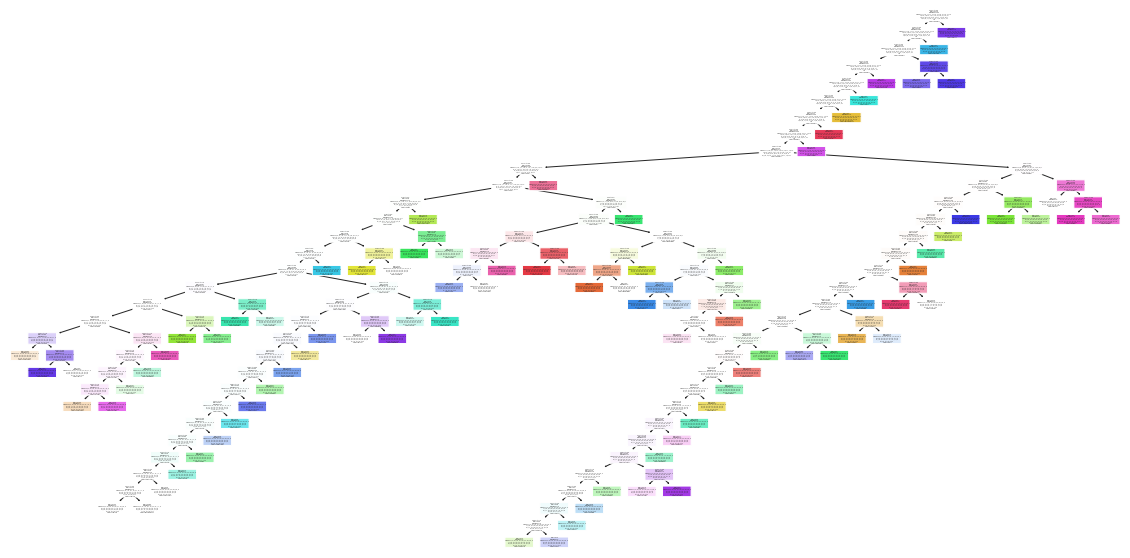

['DecisionTree_model.pkl']

In [56]:
# Training the models
# Decision Tree
start = time.time()
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=5, random_state=55)
dt.fit(x_train, y_train)
runtime_dt = round(time.time() - start, 3)
# Predictions
y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)
# Metrics
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_test_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_test_pred_dt, average='weighted', zero_division=0)
print("Training Accuracy :",round(train_acc_dt,6))
print("Test Accuracy:",round(test_acc_dt,6))
print("Precision :",round(precision_dt,6))
print("Recall:",round(recall_dt,6))
print("F1:",round(f1_dt,6))
print("Runtime:",round(runtime_dt,6))
# Visualize the first few layers
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=x.columns, class_names=encoder.classes_, filled=True, rounded=True)
plt.show()
joblib.dump(dt, 'DecisionTree_model.pkl')


In [49]:
# KNN
start = time.time()
knn = KNeighborsClassifier(n_neighbors=15, metric='cosine')
knn.fit(x_train_scaled, y_train)
runtime_knn = round(time.time() - start, 3)
# Predictions
y_train_pred_knn = knn.predict(x_train_scaled)
y_test_pred_knn = knn.predict(x_test_scaled)
# Metrics
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
precision_knn = precision_score(y_test, y_test_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_test_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_test_pred_knn, average='weighted', zero_division=0)
print("Training Accuracy :",round(train_acc_knn,6))
print("Test Accuracy:",round(test_acc_knn,6))
print("Precision :",round(precision_knn,6))
print("Recall:",round(recall_knn,6))
print("F1:",round(f1_knn,6))
print("Runtime:",round(runtime_knn,6))

joblib.dump(knn, 'KNN_model.pkl')


Training Accuracy : 0.626667
Test Accuracy: 0.513333
Precision : 0.552595
Recall: 0.513333
F1: 0.487694
Runtime: 0.019


['KNN_model.pkl']

In [50]:
# Logistic Regression
start = time.time()
logreg = LogisticRegression(C=0.0001, penalty='l2', solver='saga', max_iter=2000, random_state=42)
logreg.fit(x_train_scaled, y_train)
runtime_log = round(time.time() - start, 3)
# Predictions
y_train_pred_log = logreg.predict(x_train_scaled)
y_test_pred_log = logreg.predict(x_test_scaled)
# Metrics
train_acc_log = accuracy_score(y_train, y_train_pred_log)
test_acc_log = accuracy_score(y_test, y_test_pred_log)
precision_log = precision_score(y_test, y_test_pred_log, average='weighted', zero_division=0)
recall_log = recall_score(y_test, y_test_pred_log, average='weighted', zero_division=0)
f1_log = f1_score(y_test, y_test_pred_log, average='weighted', zero_division=0)
print("Training Accuracy :",round(train_acc_log,6))
print("Test Accuracy:",round(test_acc_log,6))
print("Precision :",round(precision_log,6))
print("Recall:",round(recall_log,6))
print("F1:",round(f1_log,6))
print("Runtime:",round(runtime_log,6))

joblib.dump(logreg, 'LogisticRegression_model.pkl')


Training Accuracy : 0.985
Test Accuracy: 0.606667
Precision : 0.640407
Recall: 0.606667
F1: 0.584229
Runtime: 35.765


['LogisticRegression_model.pkl']

In [58]:
#combining the results
results_df = pd.DataFrame([["Decision Tree",train_acc_dt,test_acc_dt,precision_dt,recall_dt,f1_dt,runtime_dt],
                          ["KNN",train_acc_knn,test_acc_knn,precision_knn,recall_knn,f1_knn,runtime_knn],
                         ["Logistic Regression",train_acc_log,test_acc_log,precision_log,recall_log,f1_log,runtime_log]],
                         columns=["Model", "Train Acccuracy", "Test Accuracy", "Precision", "Recall", "F1", "Runtime (s)"])
print(results_df)
best_model = results_df.loc[results_df['Test Accuracy'].idxmax()]
print("\n Best model =", best_model)

                 Model  Train Acccuracy  Test Accuracy  Precision    Recall  \
0        Decision Tree         0.716667       0.366667   0.383341  0.366667   
1                  KNN         0.626667       0.513333   0.552595  0.513333   
2  Logistic Regression         0.985000       0.606667   0.640407  0.606667   

         F1  Runtime (s)  
0  0.348199        1.187  
1  0.487694        0.019  
2  0.584229       35.765  

 Best model = Model              Logistic Regression
Train Acccuracy                  0.985
Test Accuracy                 0.606667
Precision                     0.640407
Recall                        0.606667
F1                            0.584229
Runtime (s)                     35.765
Name: 2, dtype: object


<Figure size 576x360 with 0 Axes>

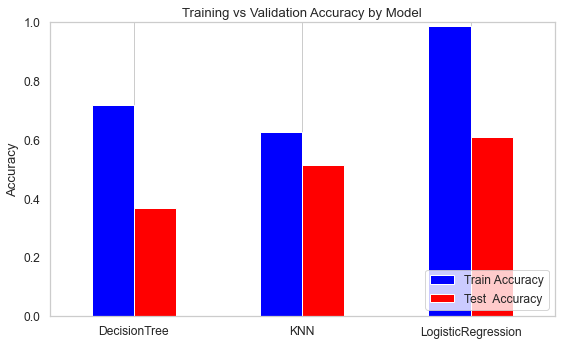

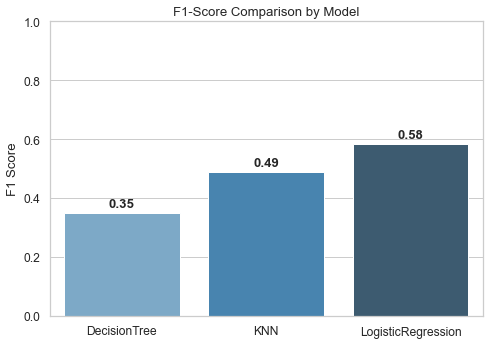

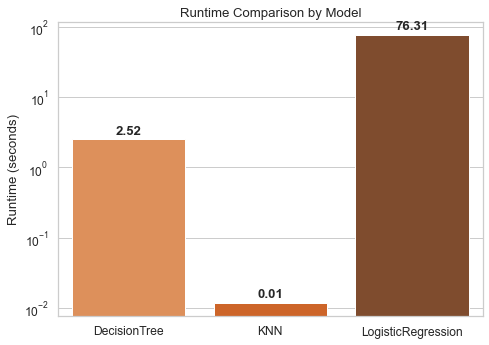

In [52]:
results_df = pd.DataFrame({
    'Train Accuracy': [0.716667, 0.626667, 0.985000],
    'Test  Accuracy': [0.366667, 0.513333, 0.606667],
    'Precision': [0.383341, 0.552595, 0.640407],
    'Recall': [0.366667, 0.513333, 0.606667],
    'F1': [0.348199, 0.487694, 0.584229],
    'Runtime (s)': [2.517, 0.012, 76.306]
}, index=['DecisionTree', 'KNN', 'LogisticRegression'])

# PLOT STYLE
sns.set(style="whitegrid", font_scale=1.1)
colors = sns.color_palette("pastel")

#Accuracy comparison
plt.figure(figsize=(8,5))
results_df[['Train Accuracy','Test  Accuracy']].plot(kind='bar', figsize=(8,5), color=['blue','red'])
plt.title('Training vs Validation Accuracy by Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#F1-score comparison
plt.figure(figsize=(7,5))
sns.barplot(x=results_df.index, y='F1', data=results_df, palette='Blues_d')
plt.title('F1-Score Comparison by Model')
plt.ylabel('F1 Score')
plt.ylim(0,1)
for i, v in enumerate(results_df['F1']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

#Runtime comparison
plt.figure(figsize=(7,5))
sns.barplot(x=results_df.index, y='Runtime (s)', data=results_df, palette='Oranges_d')
plt.title('Runtime Comparison by Model')
plt.ylabel('Runtime (seconds)')
plt.yscale('log')  # because Logistic Regression is much slower
for i, v in enumerate(results_df['Runtime (s)']):
    plt.text(i, v * 1.2, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()
